# Imports

In [10]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from datetime import datetime

# Read the data

In [11]:
df1 = pd.read_csv('./data/GPP_NEE_flux_2001-2022.csv')
df2 = pd.read_csv('./data/voc_2010-2022.csv')
df3 = pd.read_csv('./data/latent_heat_flux_2018-2022.csv')
df4 = pd.read_csv('./data/latent_heat_flux_2001-2018.csv')

# Data exploration and visualization

## Raw data

In [12]:
df1.head()

Unnamed: 0             Datetime    NEE  NEE_gapfilling_method  GPP
0           0  2001-01-01 00:00:00  0.459                      1 -0.0
1           1  2001-01-01 00:30:00  0.459                      1 -0.0
2           2  2001-01-01 01:00:00  0.459                      1 -0.0
3           3  2001-01-01 01:30:00  0.459                      1 -0.0
4           4  2001-01-01 02:00:00  0.458                      1 -0.0

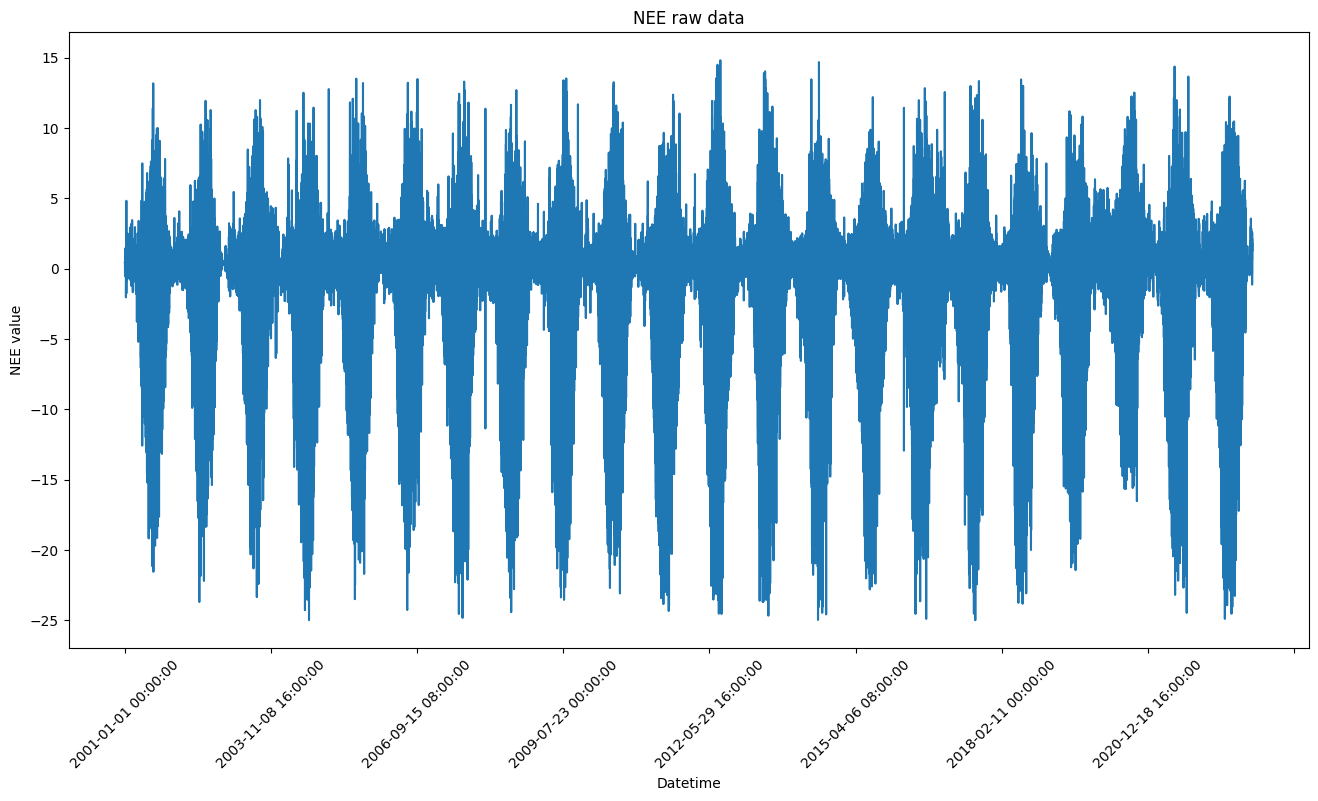

In [32]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df1.plot('Datetime','NEE', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE value')
ax.set_title('NEE raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.show()

In [14]:
df2.head()

Unnamed: 0             Datetime  monoterpene_flux  methanol_flux  \
0           0  2010-05-28 17:22:00          47.81872       -2.07877   
1           1  2010-05-28 20:22:00           9.34395        0.66285   
2           2  2010-05-28 23:22:00          10.63157       -1.77225   
3           3  2010-05-29 02:22:00          12.27364       -2.02885   
4           4  2010-05-29 05:22:00          19.89456       -2.66424   

   acetone_flux  acetaldehyde_flux  
0      -1.91743           -1.50219  
1      -3.22838            0.39991  
2      -3.11930           -0.03744  
3      -2.26063           -0.53726  
4           NaN            0.64042

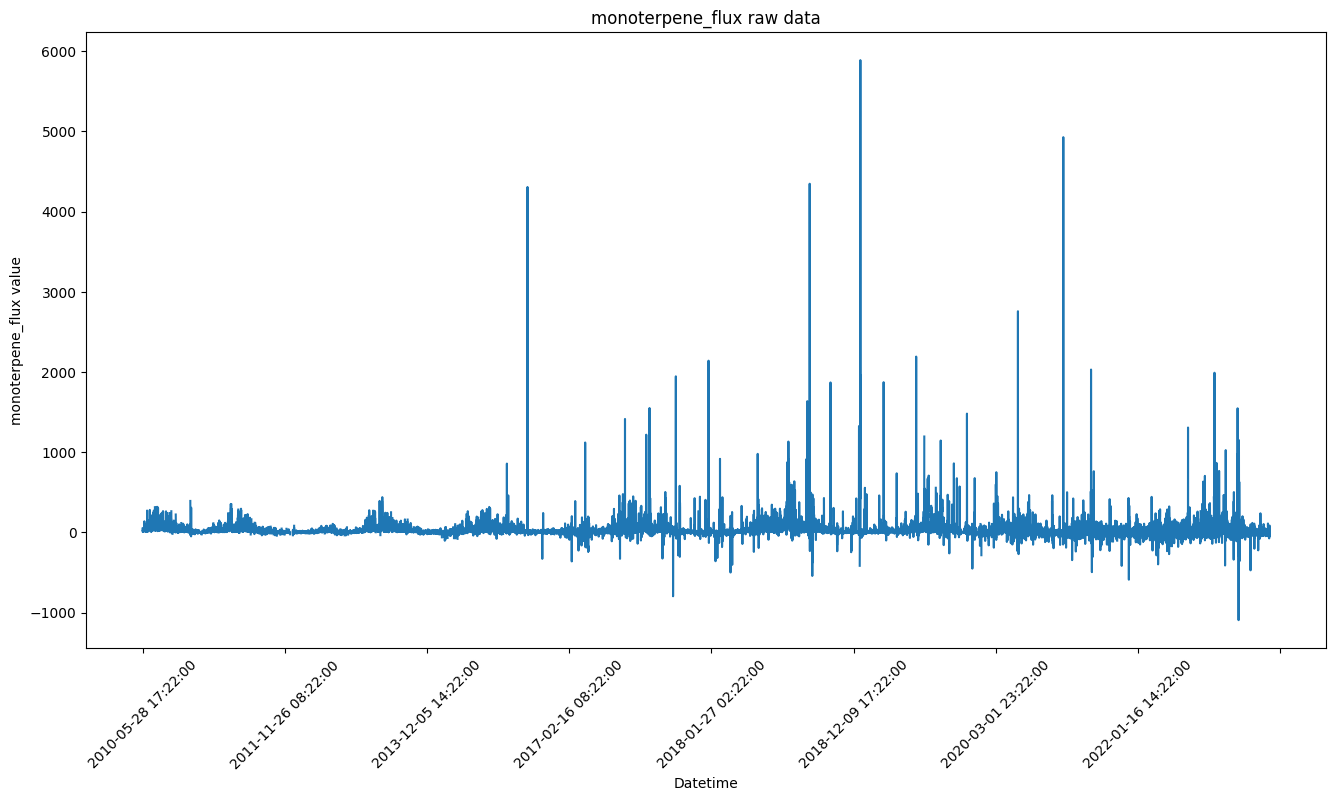

In [31]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','monoterpene_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('monoterpene_flux value')
ax.set_title('monoterpene_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.show()

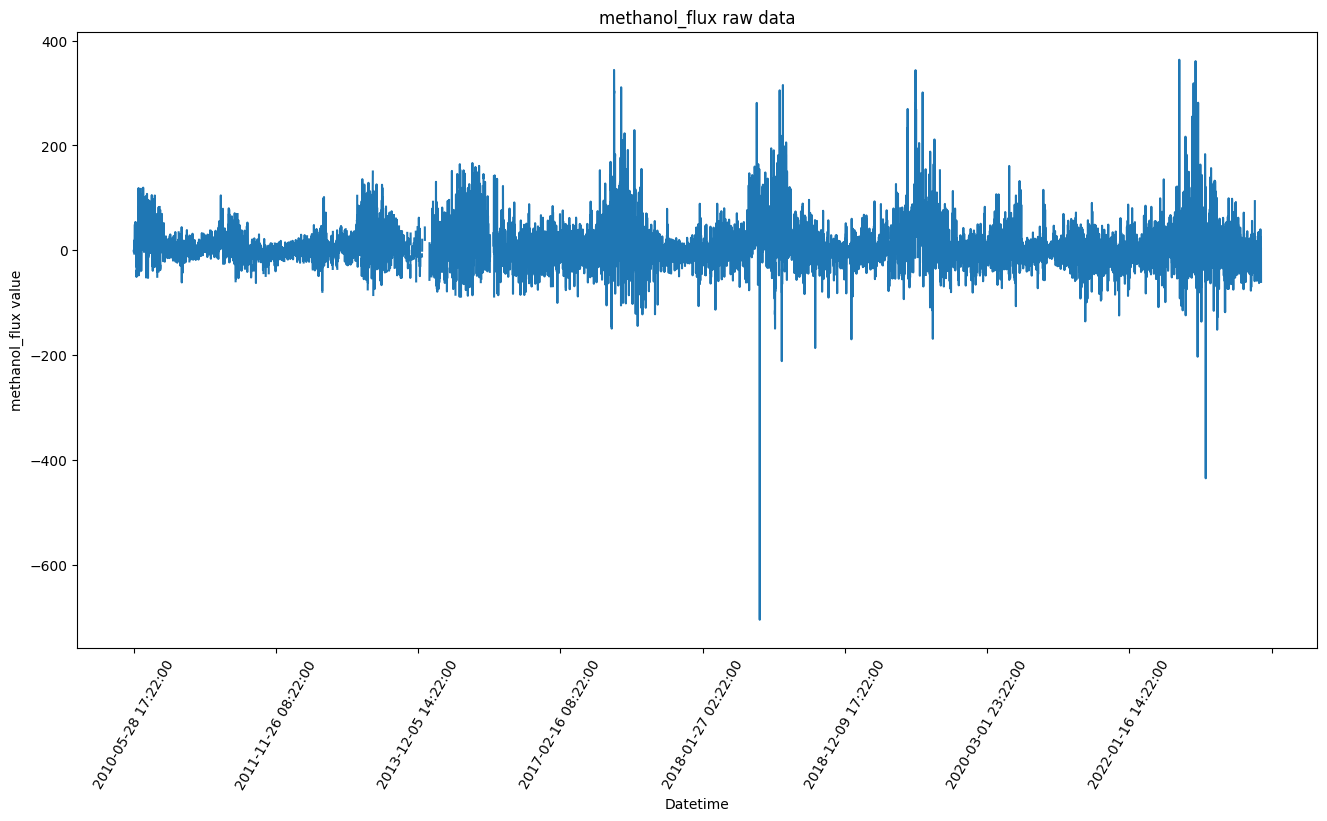

In [30]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','methanol_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('methanol_flux value')
ax.set_title('methanol_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()


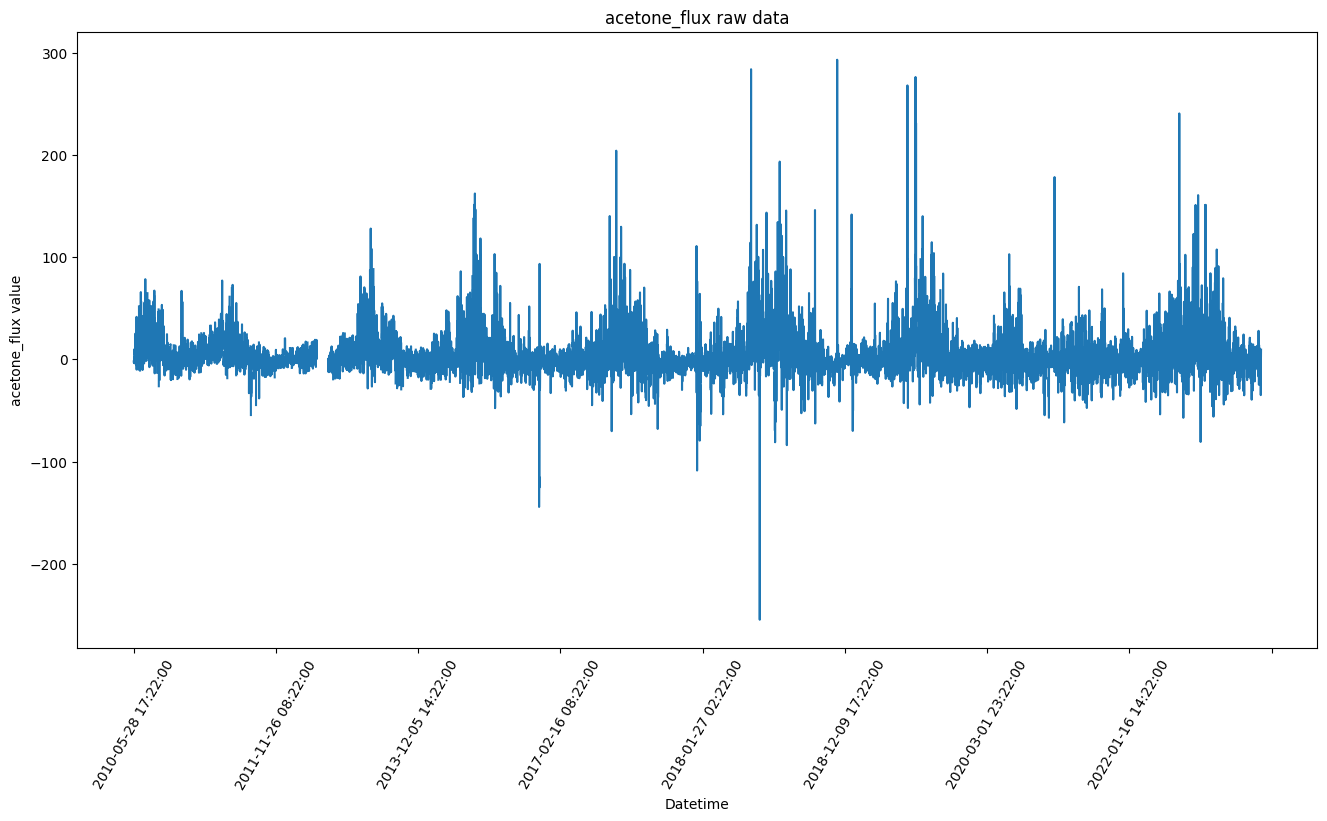

In [33]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetone_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('acetone_flux value')
ax.set_title('acetone_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()

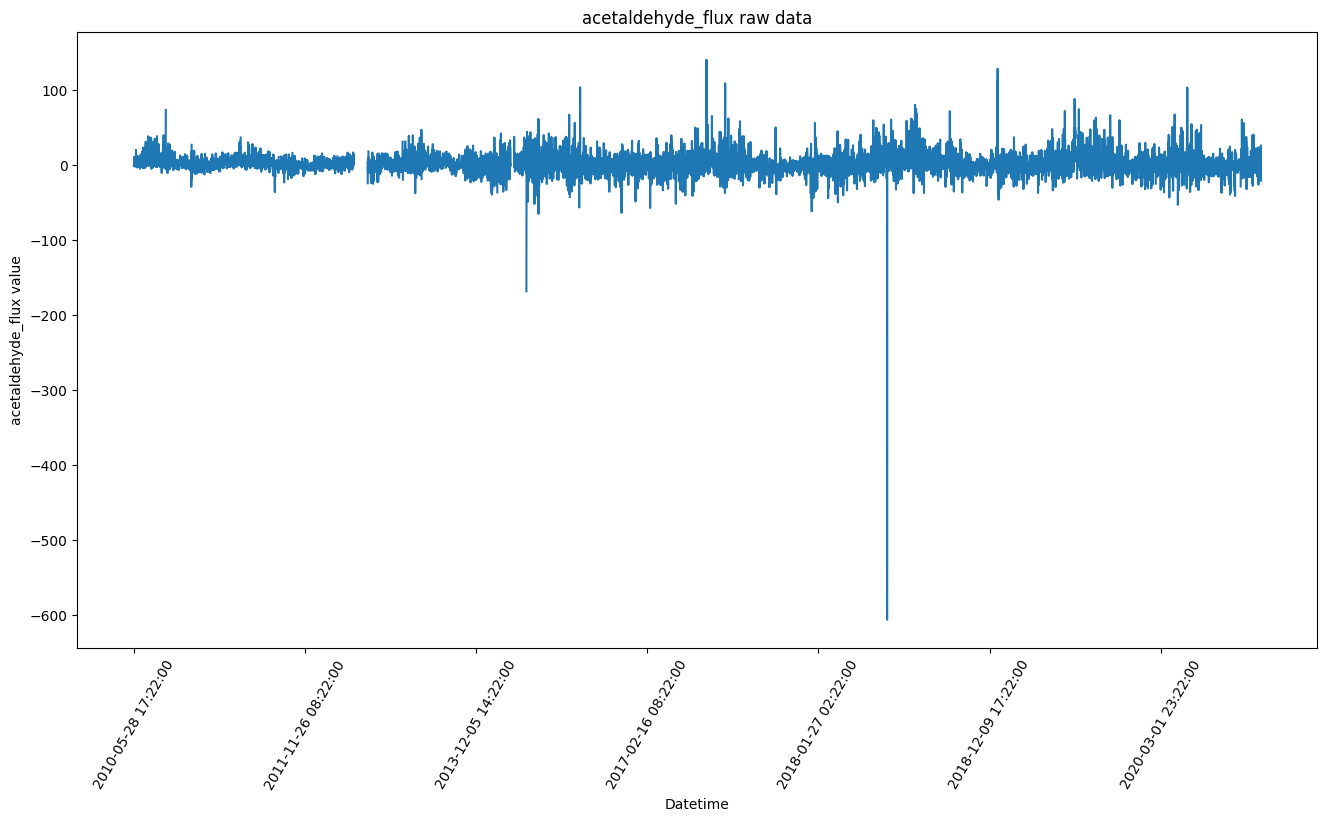

In [34]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetaldehyde_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('acetaldehyde_flux value')
ax.set_title('acetaldehyde_flux raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()


In [54]:
df3.head()

Unnamed: 0             Datetime  latent_heat_flux_after_4-2018  \
0           0  2018-04-01 00:00:00                       -0.10731   
1           1  2018-04-01 01:30:00                        0.36941   
2           2  2018-04-01 02:00:00                       -0.51663   
3           3  2018-04-01 02:30:00                        0.05330   
4           4  2018-04-01 03:00:00                        1.07773   

   latent_heat_flux_quality_flag_after_4-2018  HYY_EDDY233.LE  
0                                         1.0             NaN  
1                                         1.0             NaN  
2                                         1.0             NaN  
3                                         1.0             NaN  
4                                         1.0             NaN

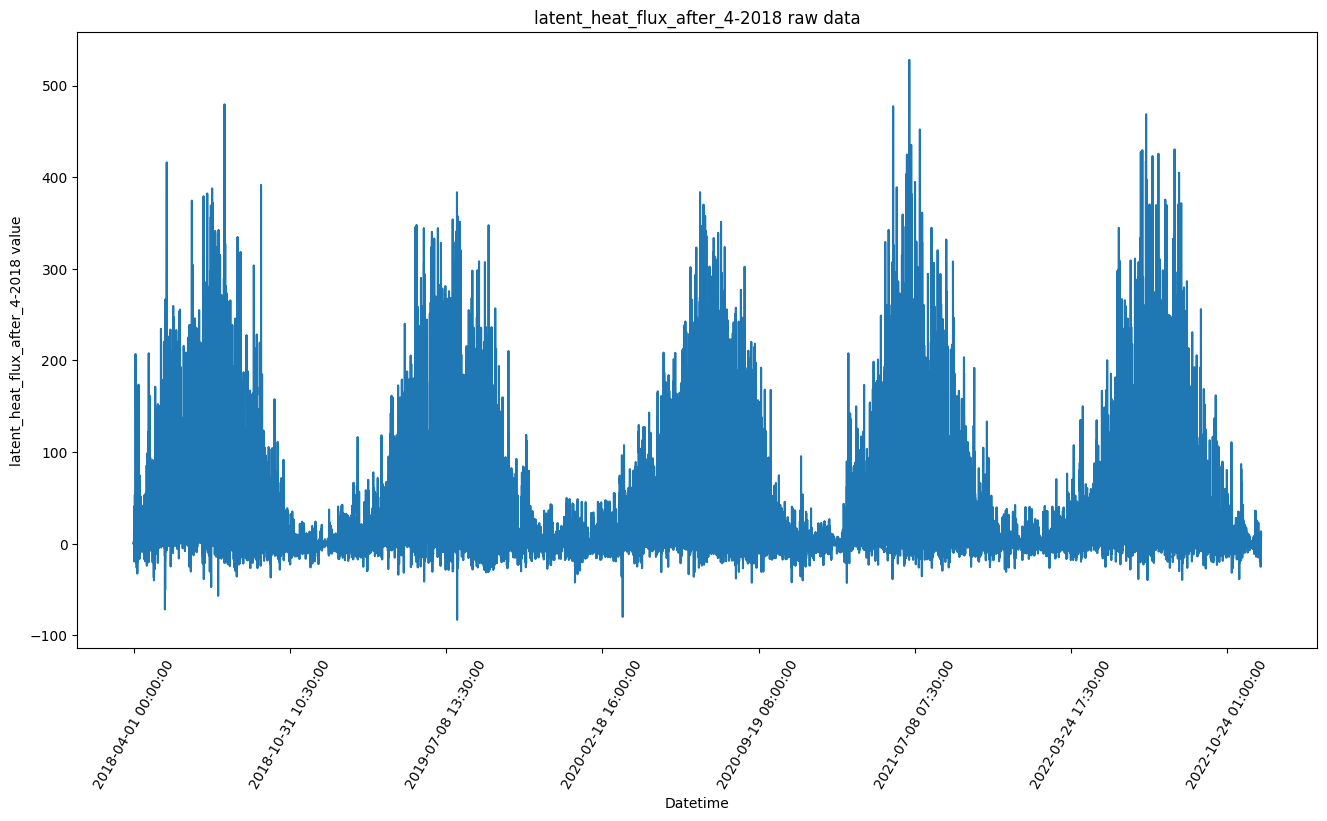

In [52]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df3.plot('Datetime','latent_heat_flux_after_4-2018', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('latent_heat_flux_after_4-2018 value')
ax.set_title('latent_heat_flux_after_4-2018 raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()

In [55]:
df4.head()

Datetime  latent_heat_flux_after_4-2018  HYY_EDDY233.LE
0  2001-01-01 00:00:00                            NaN         1.41180
1  2001-01-01 00:30:00                            NaN         1.19590
2  2001-01-01 01:00:00                            NaN         1.16250
3  2001-01-01 01:30:00                            NaN         0.10336
4  2001-01-01 02:00:00                            NaN         0.20723

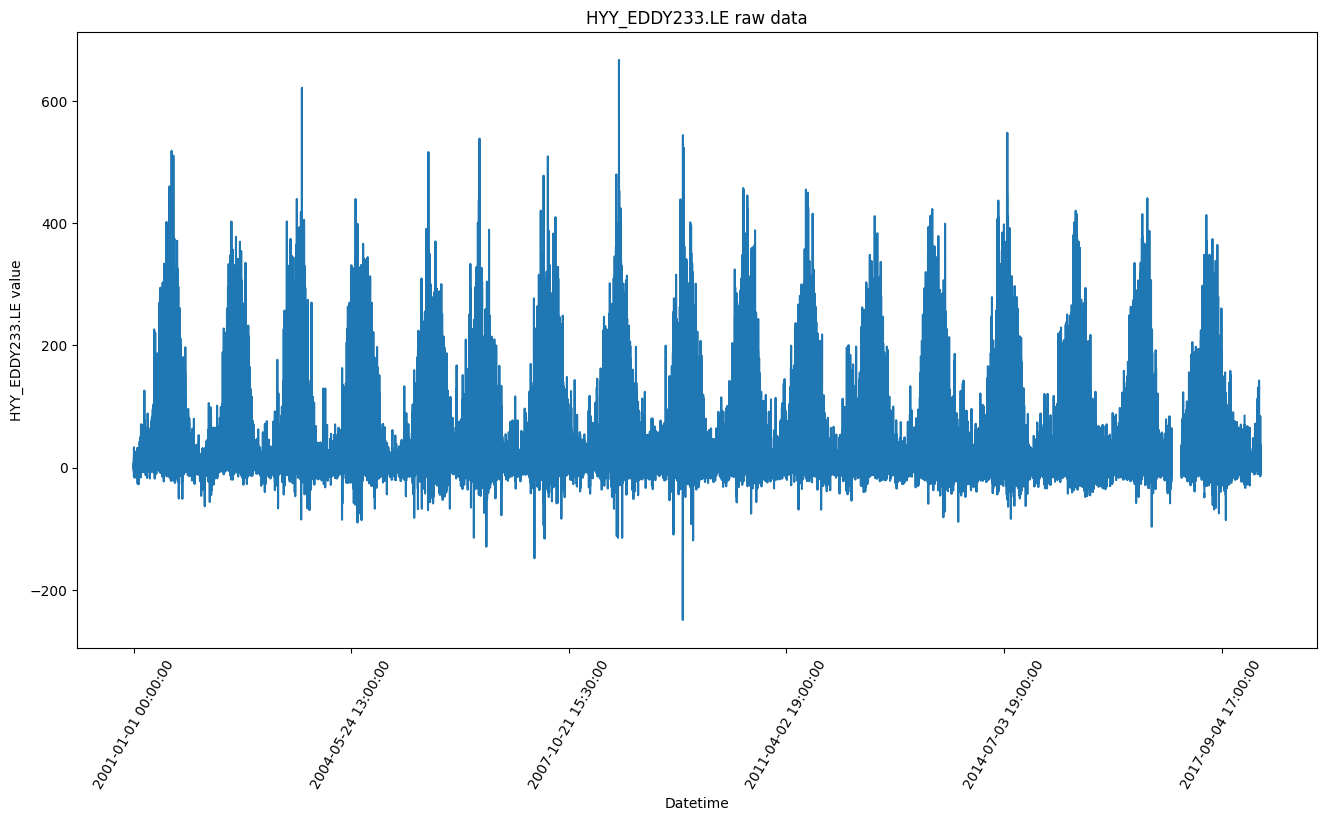

In [53]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df4.plot('Datetime','HYY_EDDY233.LE', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('HYY_EDDY233.LE value')
ax.set_title('HYY_EDDY233.LE raw data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

plt.show()

## Daily data

In [56]:
# Convert dates to datetime objects
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Datetime'] = pd.to_datetime(df3['Datetime'])
df4['Datetime'] = pd.to_datetime(df4['Datetime'])

# Aggregate to daily level
daily_df1 = df1.resample('D', on = 'Datetime').mean().reset_index()
daily_df2 = df2.resample('D', on = 'Datetime').mean().reset_index()
daily_df3 = df3.resample('D', on = 'Datetime').mean().reset_index()
daily_df4 = df4.resample('D', on = 'Datetime').mean().reset_index()

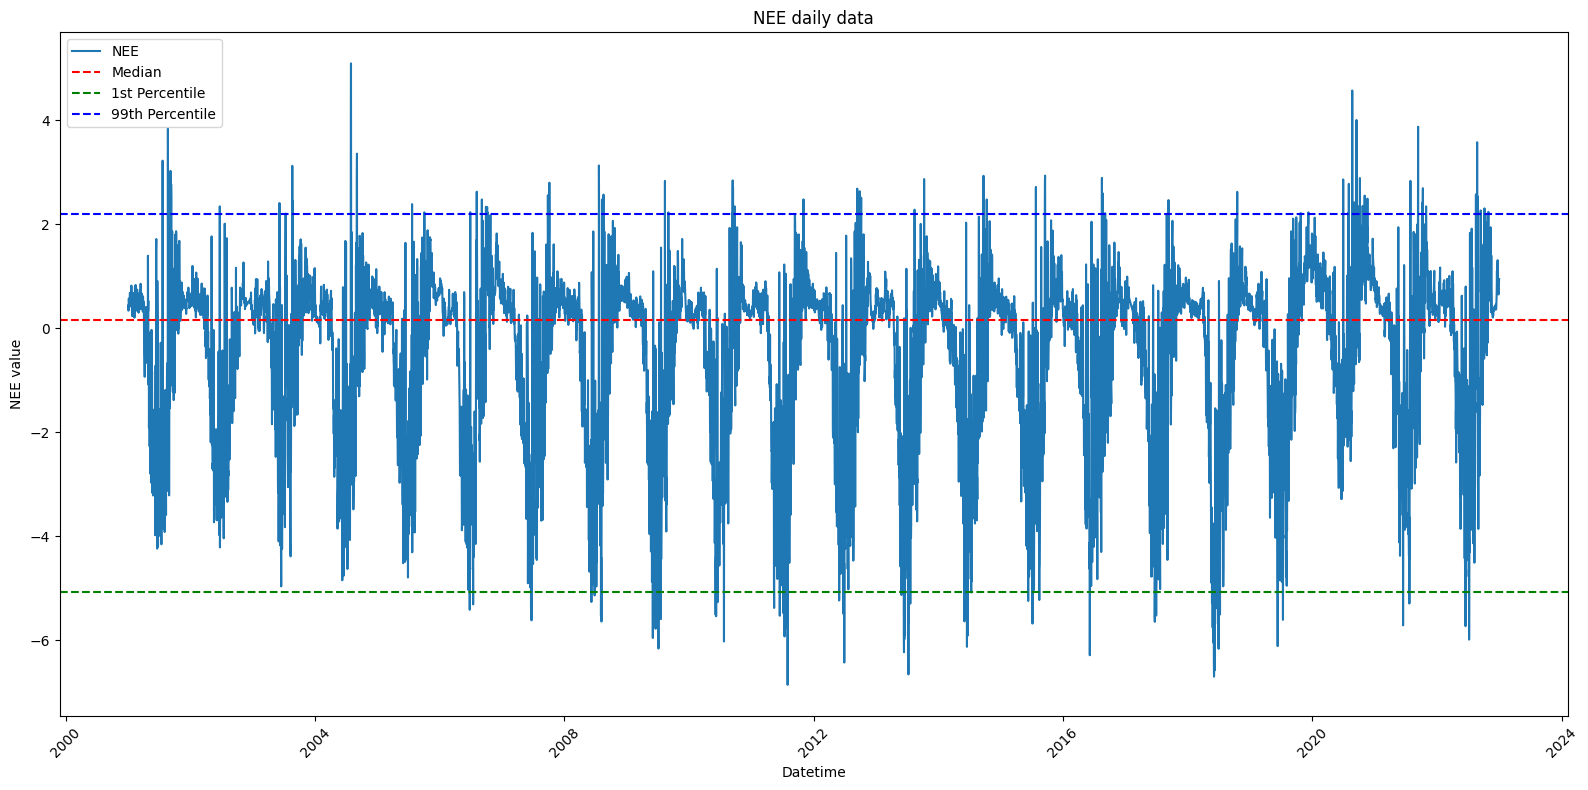

In [60]:
# Calculate median and the percentiles
median = daily_df1['NEE'].median()
q01 = daily_df1['NEE'].quantile(0.01)
q99 = daily_df1['NEE'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df1['Datetime'], daily_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE value')
ax.set_title('NEE daily data')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

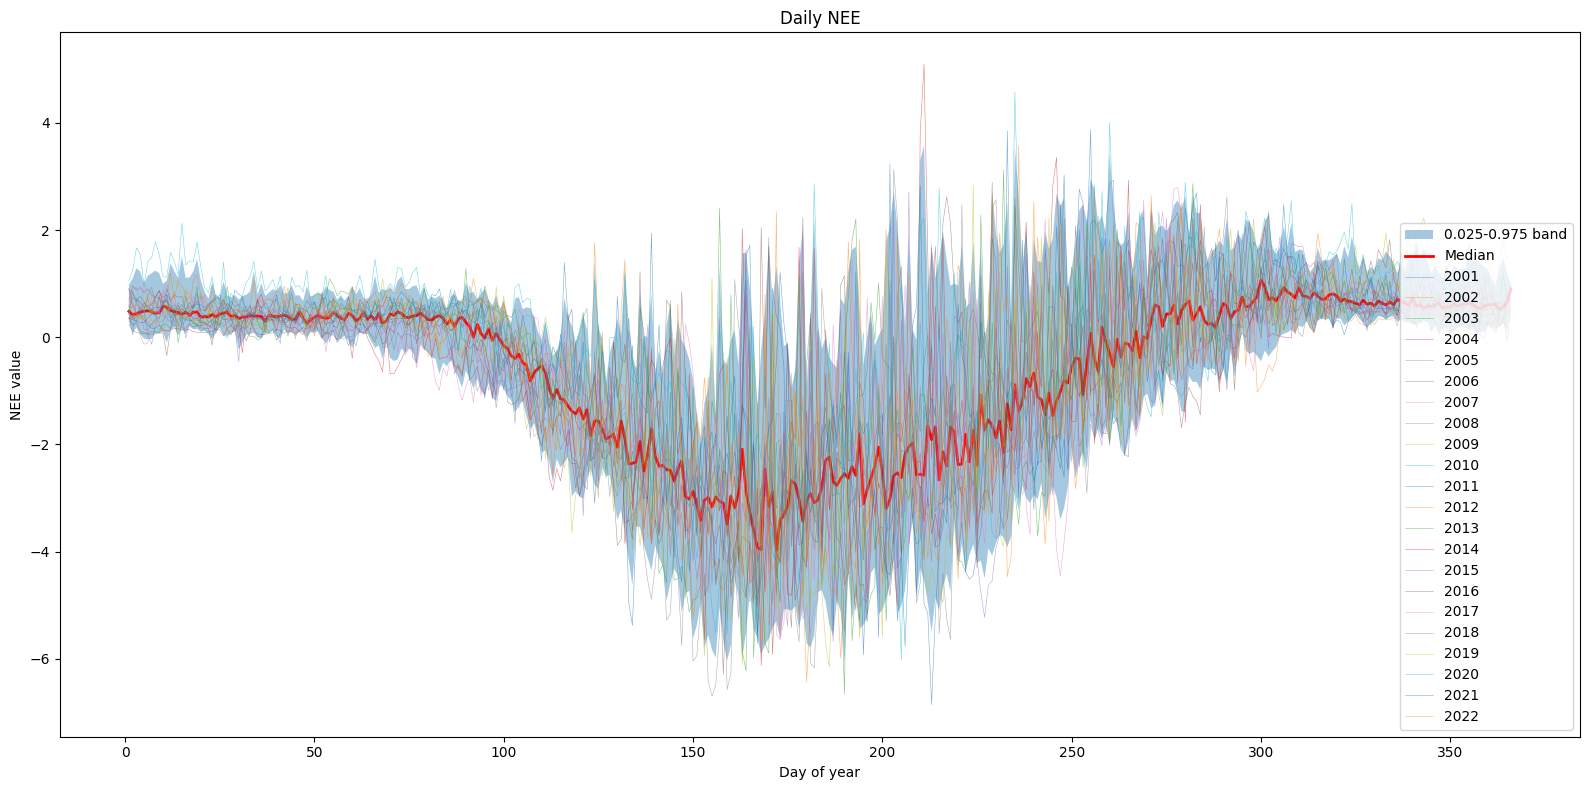

In [79]:
# Create a copy of the dataframe to avoid modifying the original
daily_df1_years = daily_df1.copy()

# Add a column for the day of year
daily_df1_years['day'] = daily_df1_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df1_years['year'] = daily_df1_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df1_years = daily_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df1_years = daily_df1_years.pivot(index='day', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(daily_df1_years.index, daily_df1_years.quantile(0.025, axis=1), daily_df1_years.quantile(0.975, axis=1), alpha=0.4)

# Plot the median
daily_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
daily_df1_years.plot(ax=ax, alpha=0.6, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('NEE value')
ax.set_title('Daily NEE')
ax.legend(['0.025-0.975 band', 'Median'] + daily_df1_years.columns.tolist(), loc='lower right')

plt.tight_layout()

plt.show()

<Axes: xlabel='Datetime'>

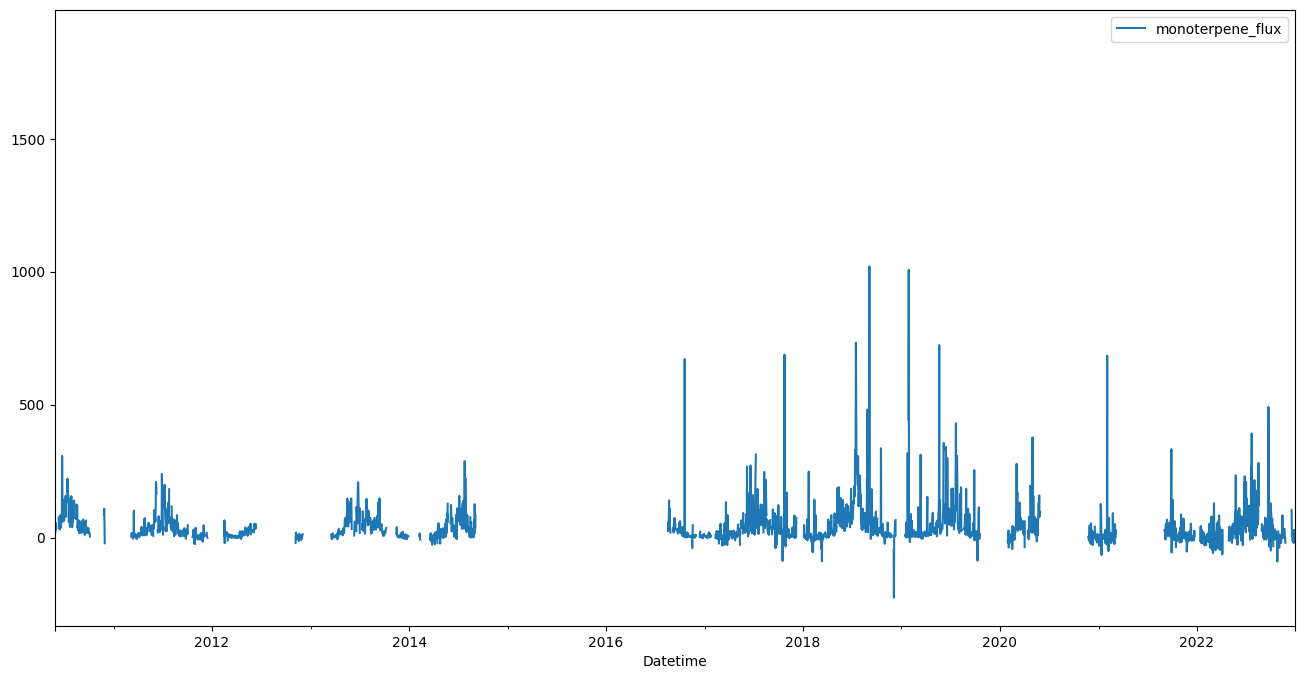

In [132]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'monoterpene_flux', ax=ax)

<Axes: xlabel='Datetime'>

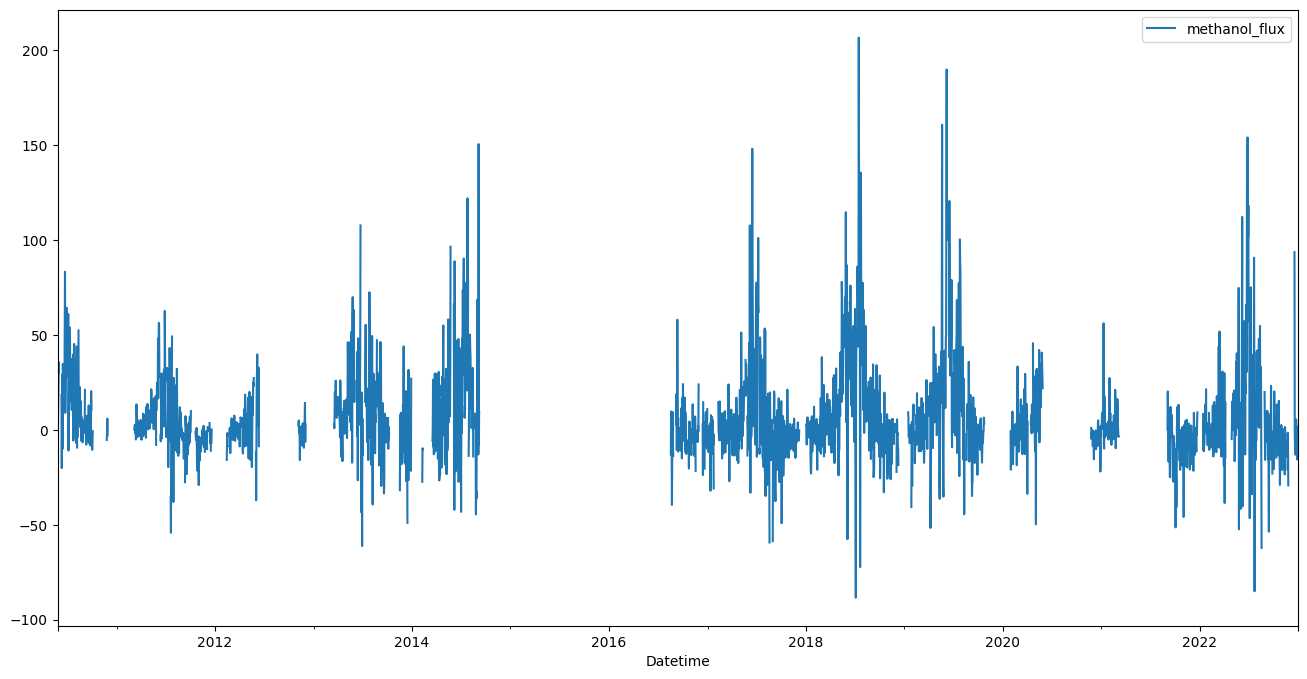

In [133]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'methanol_flux', ax=ax)

<Axes: xlabel='Datetime'>

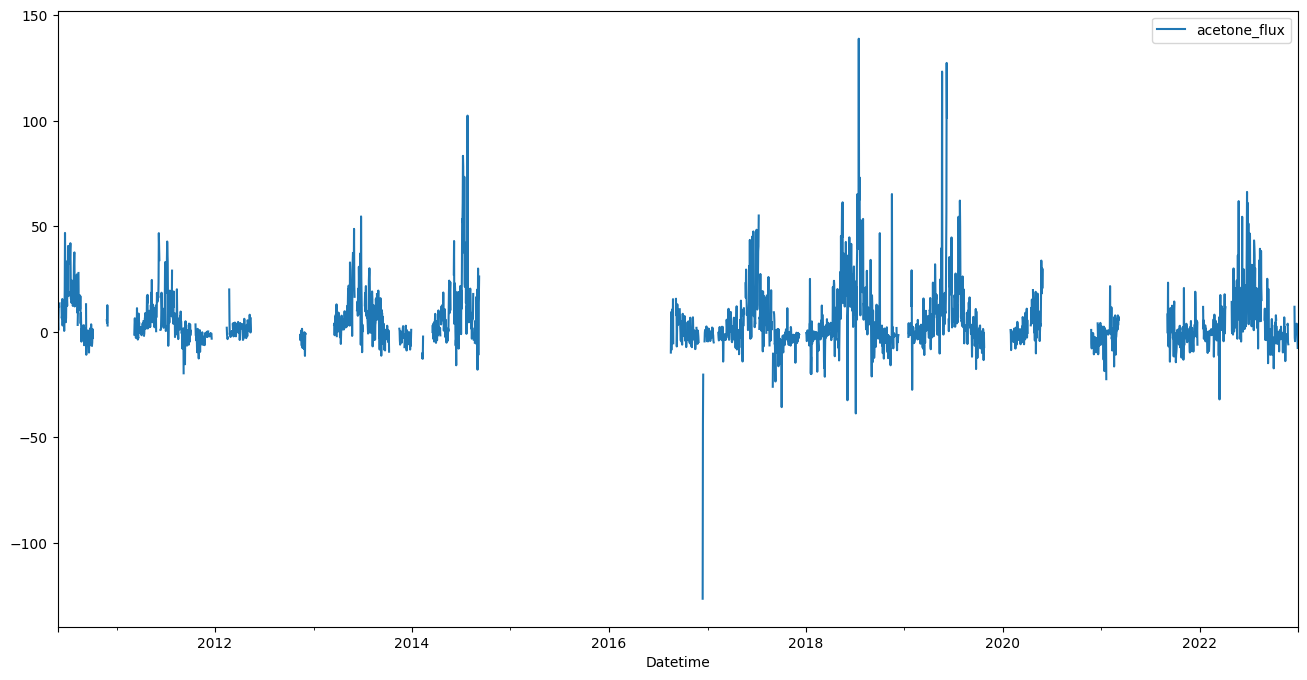

In [134]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'acetone_flux', ax=ax)

<Axes: xlabel='Datetime'>

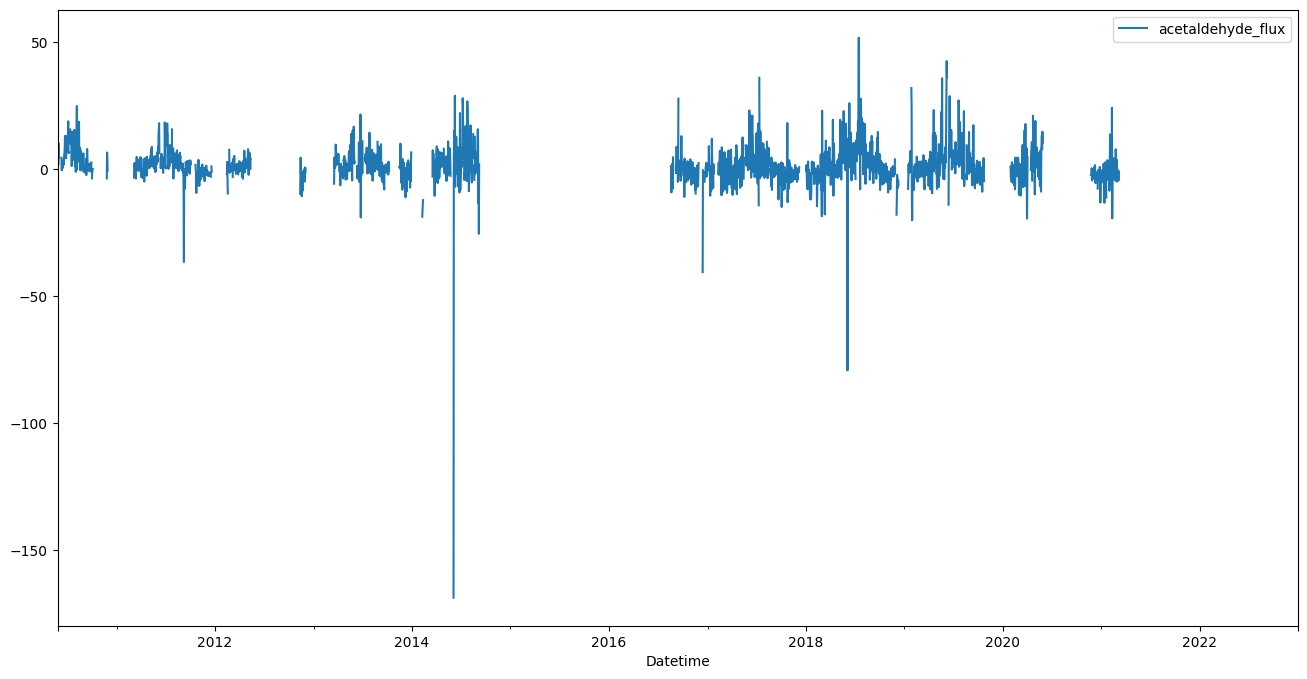

In [135]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

<Axes: xlabel='Datetime'>

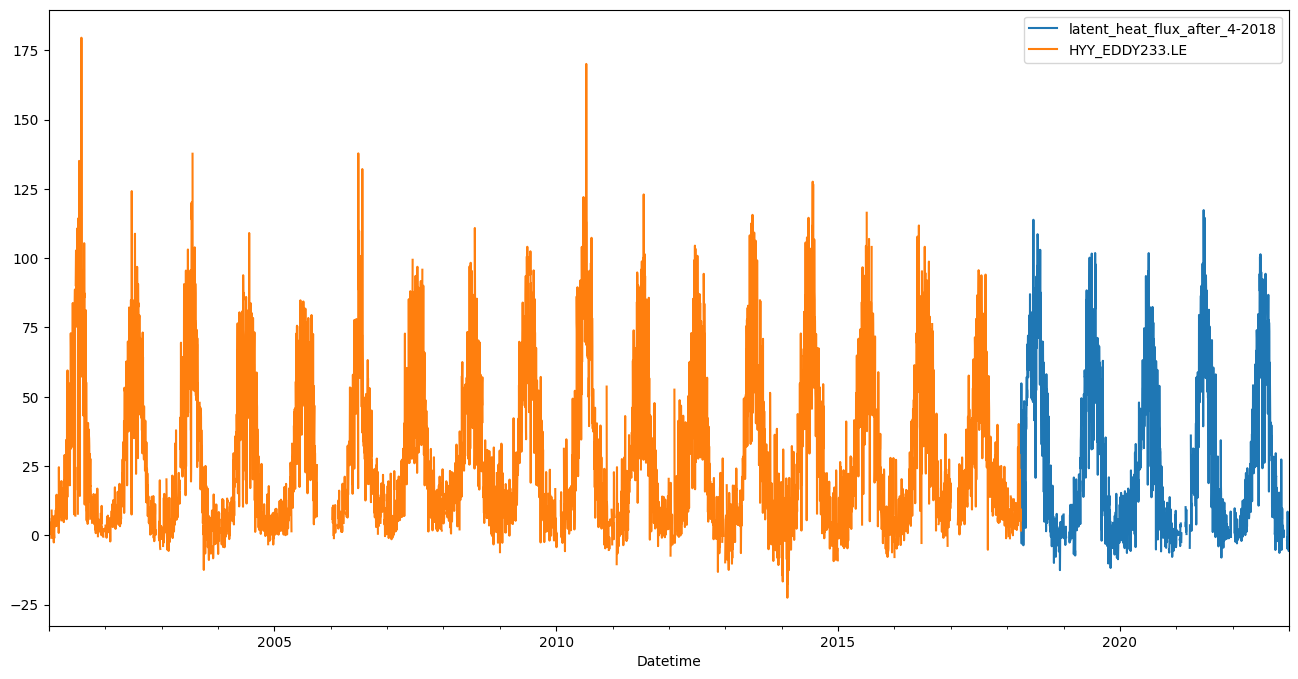

In [138]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df3.plot('Datetime', 'latent_heat_flux_after_4-2018', ax=ax)
daily_df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)

## Weekly data

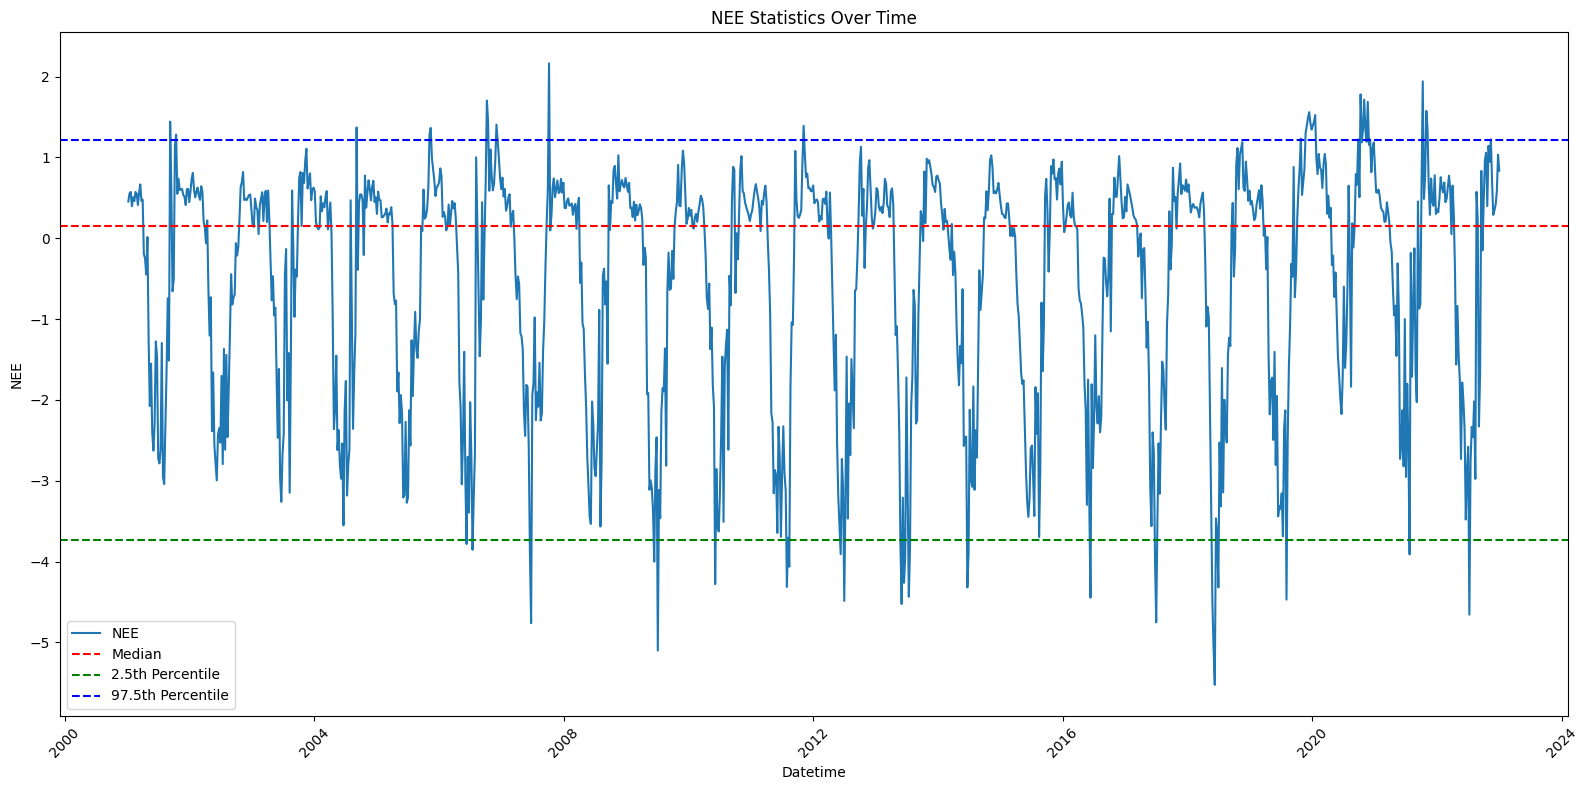

In [66]:
weekly_df1 = df1.resample('W', on = 'Datetime').mean().reset_index()


# Calculate median and the percentiles
median = weekly_df1['NEE'].median()
q025 = weekly_df1['NEE'].quantile(0.025)
q975 = weekly_df1['NEE'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df1['Datetime'] , weekly_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('NEE Statistics Over Time')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


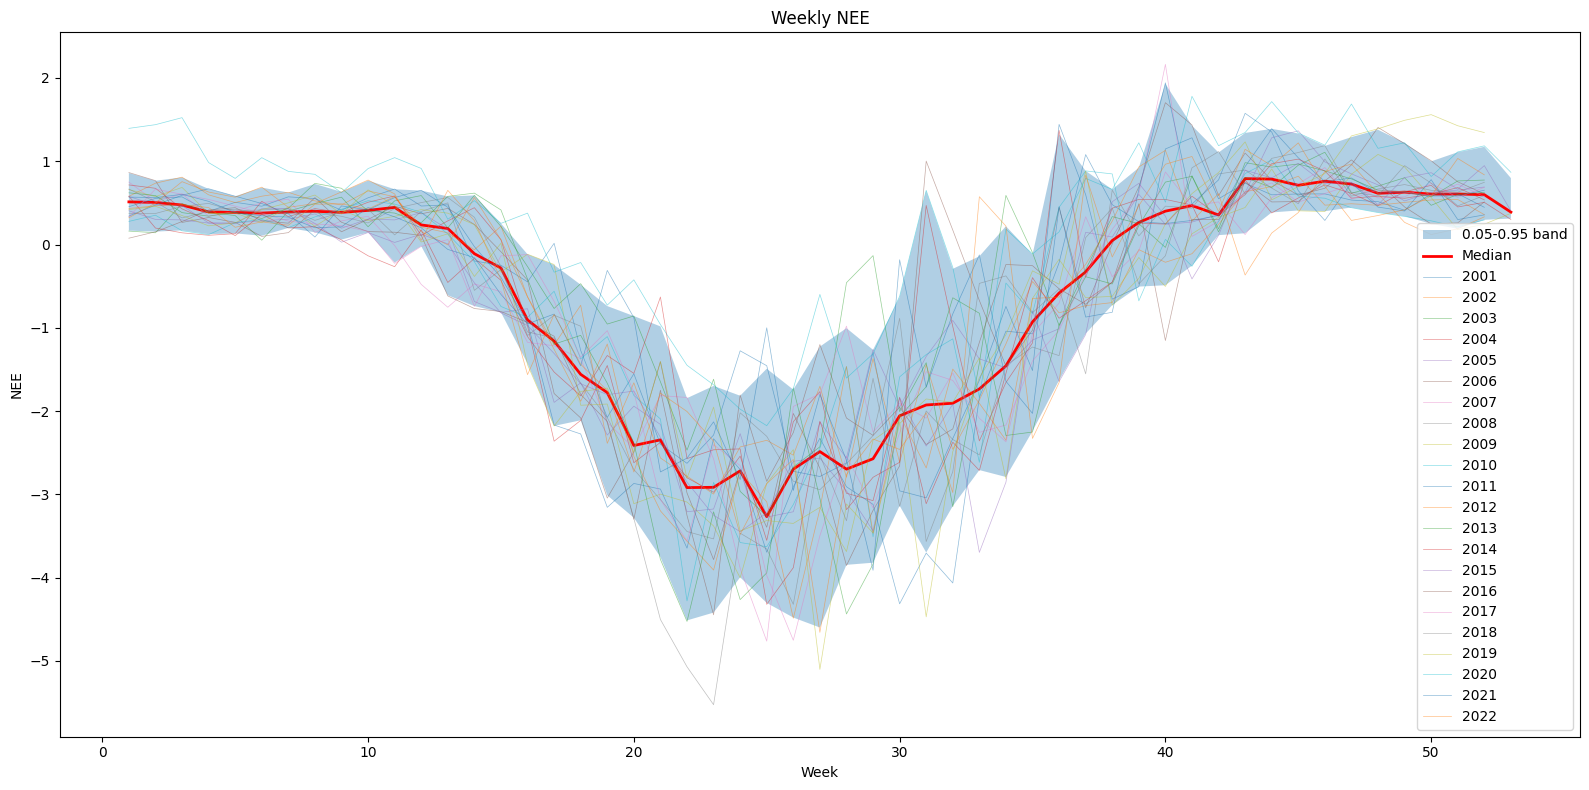

In [80]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df1_years = weekly_df1.copy()

# Add a column for the week number
weekly_df1_years['week'] = weekly_df1_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df1_years['year'] = weekly_df1_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df1_years = weekly_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df1_years = weekly_df1_years.pivot(index='week', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df1_years.index, weekly_df1_years.quantile(0.05, axis=1), weekly_df1_years.quantile(0.95, axis=1), alpha=0.35)

# Plot the median
weekly_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df1_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('NEE')
ax.set_title('Weekly NEE')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df1_years.columns.tolist(), loc='lower right')

plt.tight_layout()

plt.show()

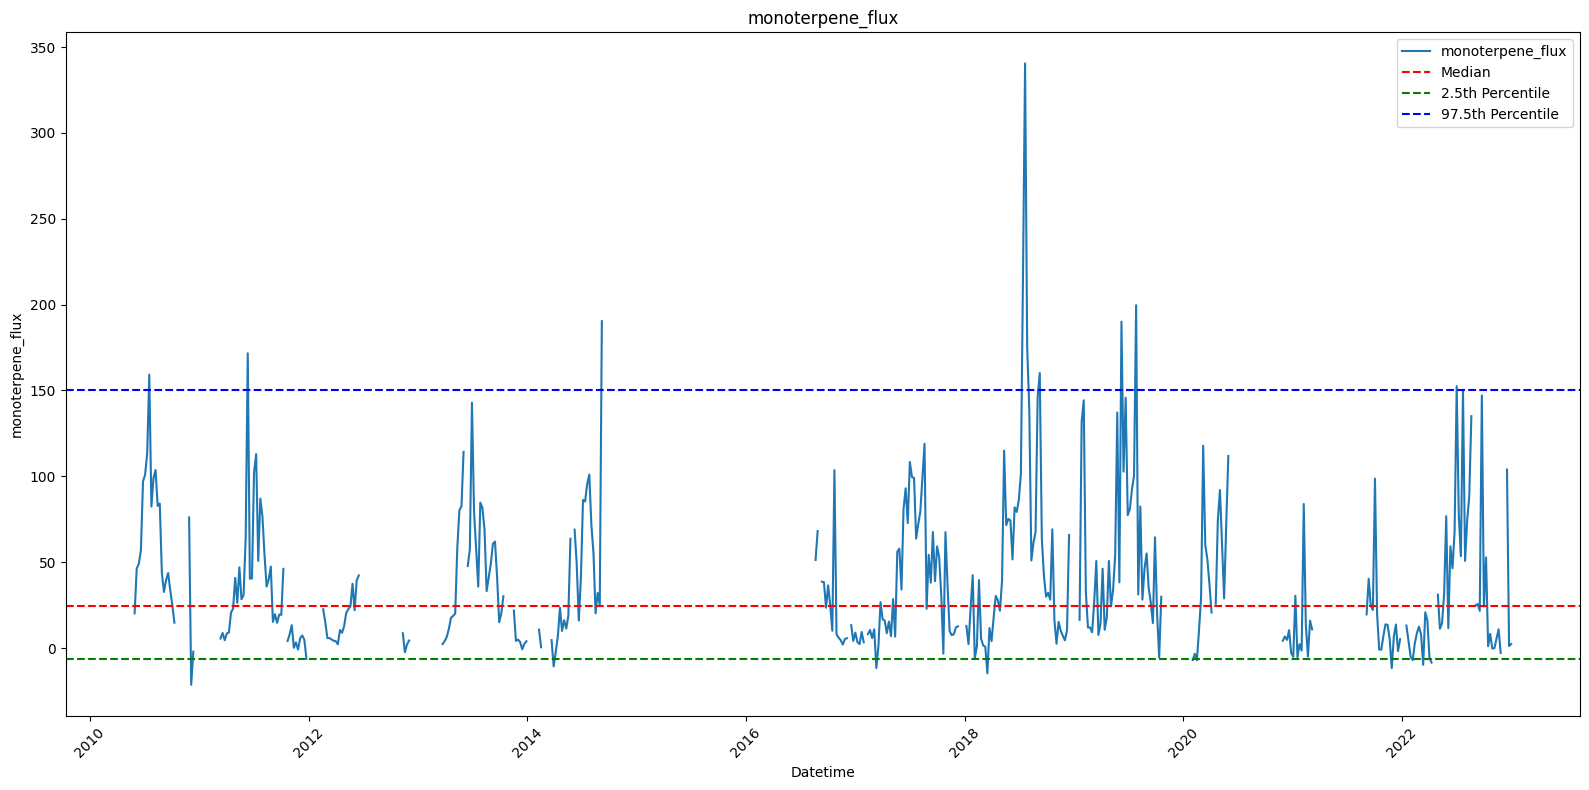

In [150]:
weekly_df2 = df2.resample('W', on = 'Datetime').mean().reset_index()

# Calculate median, 10th and 90th percentiles
weekly_df2['median'] = weekly_df2['monoterpene_flux'].median()
weekly_df2['q10'] = weekly_df2['monoterpene_flux'].quantile(0.1)
weekly_df2['q90'] = weekly_df2['monoterpene_flux'].quantile(0.9)

dates = weekly_df2['Datetime']  # Extract dates for clarity
nee_values = weekly_df2['monoterpene_flux']  # Extract NEE values for clarity

# Calculate additional statistics
median = nee_values.median()
q025 = nee_values.quantile(0.025)
q975 = nee_values.quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(dates, nee_values, label='monoterpene_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('monoterpene_flux')
ax.set_title('monoterpene_flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

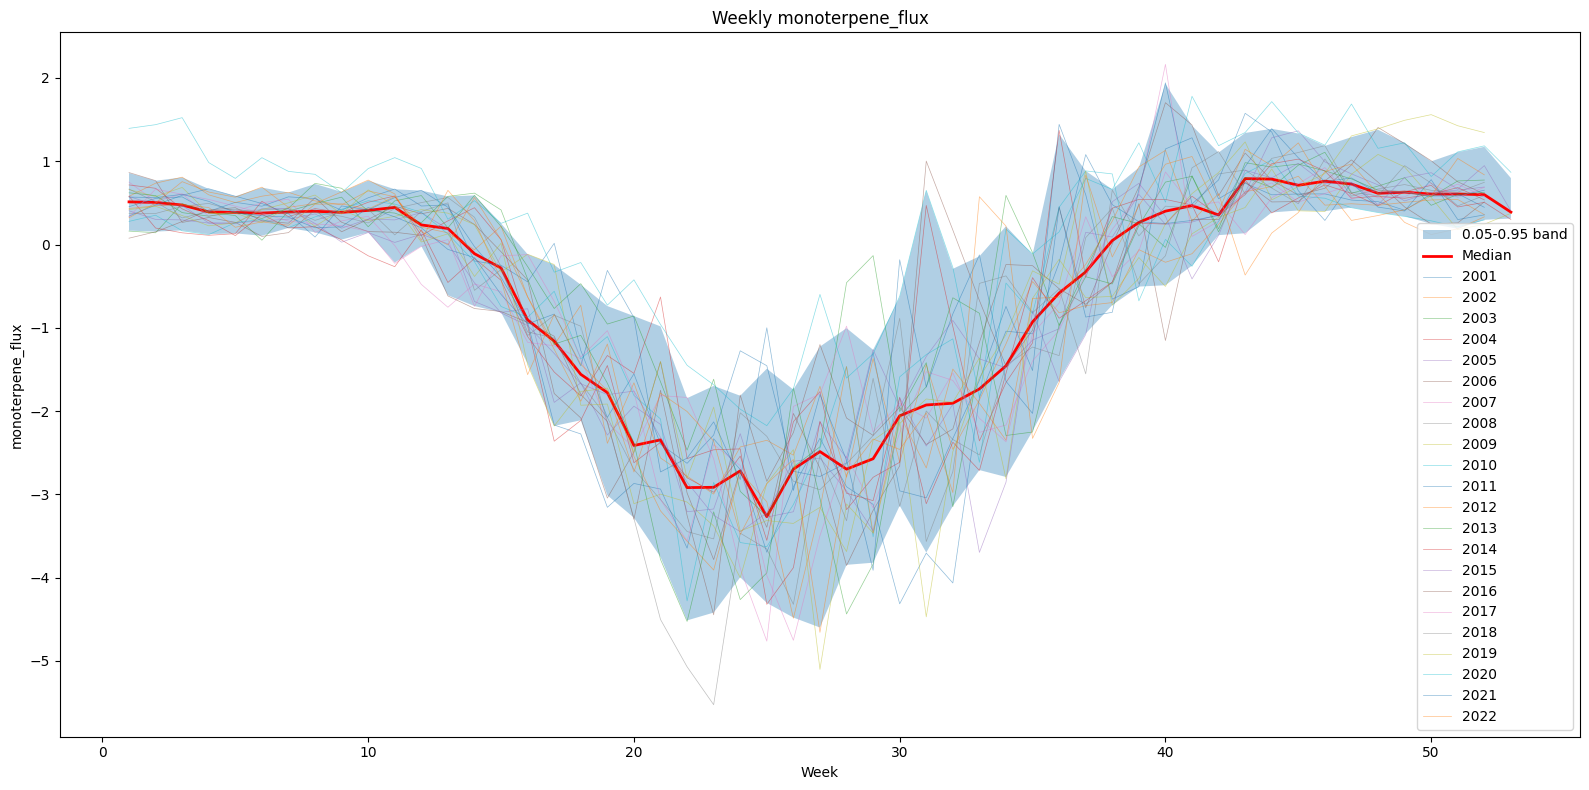

In [149]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df1_years.index, weekly_df1_years.quantile(0.05, axis=1), weekly_df1_years.quantile(0.95, axis=1), alpha=0.35)

# Plot the median
weekly_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df1_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('monoterpene_flux')
ax.set_title('Weekly monoterpene_flux')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df1_years.columns.tolist(), loc='lower right')

plt.tight_layout()

plt.show()

<Axes: xlabel='Datetime'>

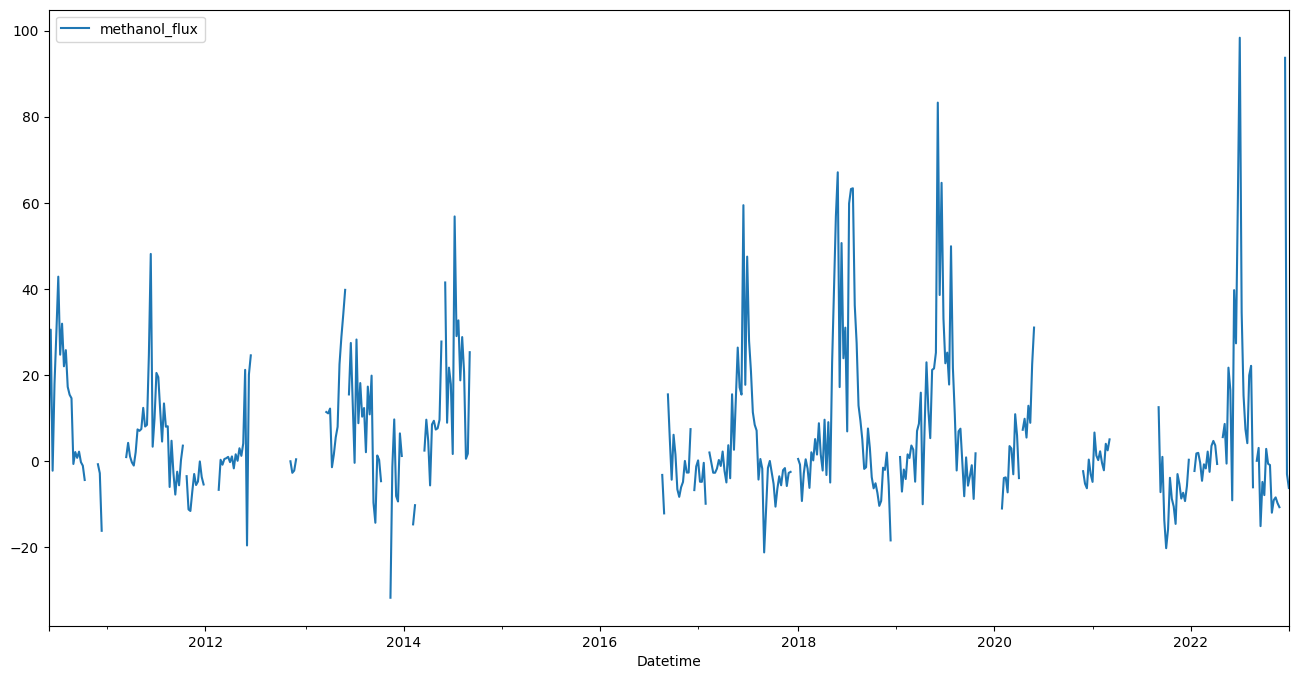

In [96]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'methanol_flux', ax=ax)

<Axes: xlabel='Datetime'>

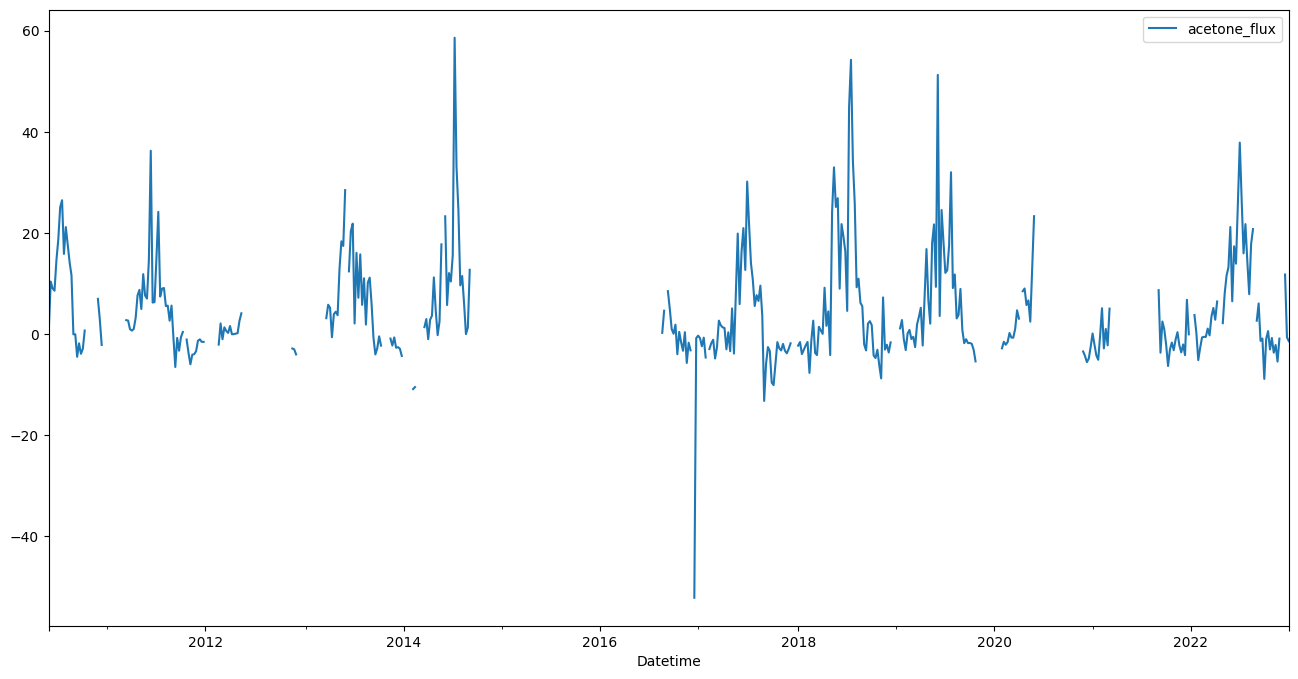

In [97]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'acetone_flux', ax=ax)

<Axes: xlabel='Datetime'>

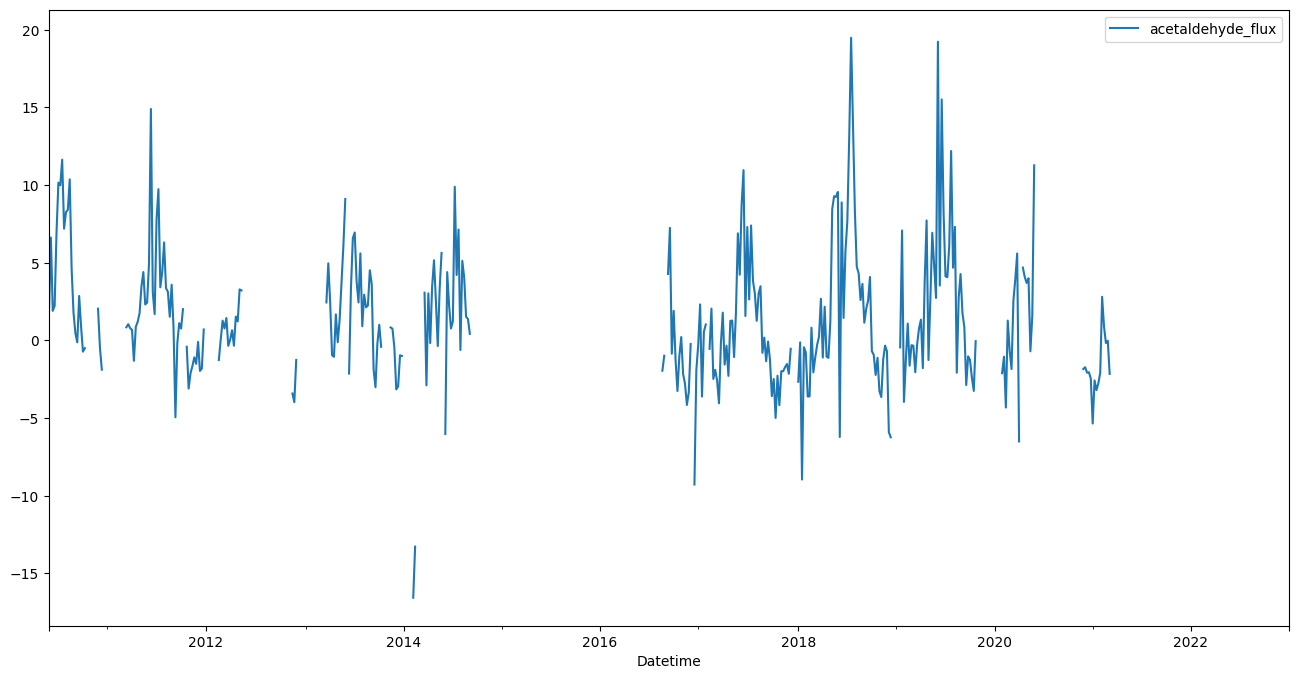

In [98]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

In [101]:
weekly_df3 = df3.resample('W', on = 'Datetime').mean().reset_index()
weekly_df3.head()
weekly_df4 = df4.resample('W', on = 'Datetime').mean().reset_index()
weekly_df4.head()

Datetime  Unnamed: 0  HYY_EDDY233.LE  HYY_EDDY233.Qc_LE
0 2001-01-07        90.0        2.606718                NaN
1 2001-01-14       305.0        2.631150                NaN
2 2001-01-21       538.0        2.748805                NaN
3 2001-01-28       777.0        3.311390                NaN
4 2001-02-04      1061.5        0.888970                NaN

<Axes: xlabel='Datetime'>

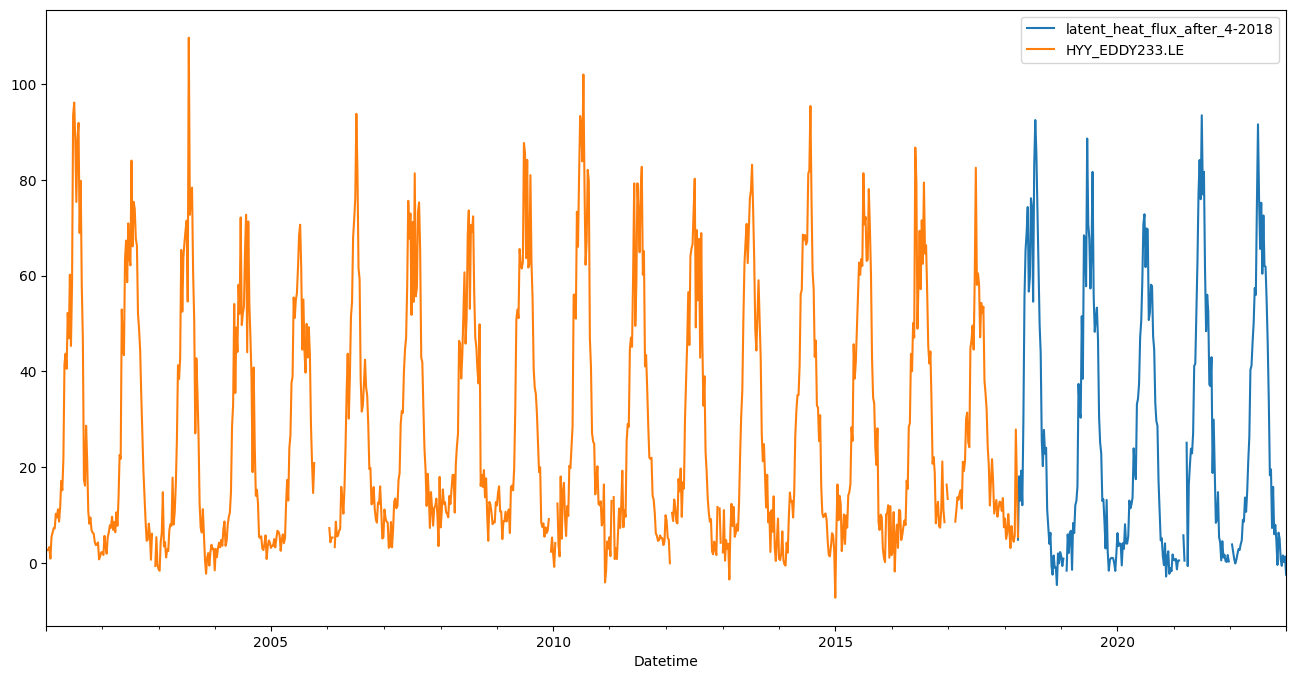

In [102]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df3.plot('Datetime', 'latent_heat_flux_after_4-2018', ax=ax)
weekly_df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)

## Monthly data

In [91]:
monthly_df1 = df1.resample('M', on = 'Datetime').mean().reset_index()
monthly_df1.head()

/tmp/ipykernel_15892/2348110587.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df1 = df1.resample('M', on = 'Datetime').mean().reset_index()


Datetime  Unnamed: 0       NEE  NEE_gapfilling_method       GPP
0 2001-01-31       743.5  0.500258               0.752016  0.078475
1 2001-02-28      2159.5  0.506229               0.708333  0.104264
2 2001-03-31      3575.5  0.530796               0.452285  0.235153
3 2001-04-30      5039.5 -0.229057               0.326389  1.650933
4 2001-05-31      6503.5 -1.966106               0.340054  4.672889

<Axes: xlabel='Datetime'>

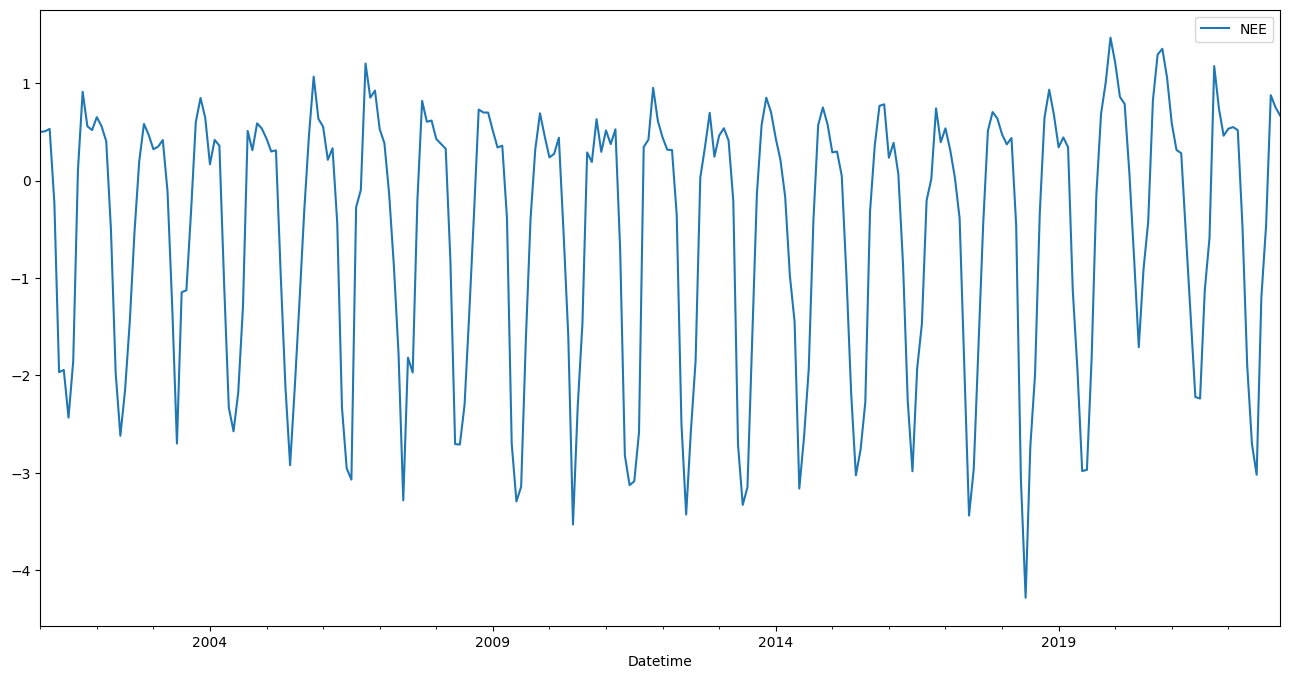

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df1.plot('Datetime','NEE', ax=ax)

In [33]:
monthly_df2 = df2.resample('M', on = 'Datetime').mean().reset_index()
monthly_df2.head()

/tmp/ipykernel_15892/3324651183.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df2 = df2.resample('M', on = 'Datetime').mean().reset_index()


Datetime  Unnamed: 0  monoterpene_flux  methanol_flux  acetone_flux  \
0 2010-05-31        11.0         25.416085      12.598373      2.743635   
1 2010-06-30        79.0         73.983493      24.146687     12.054399   
2 2010-07-31       221.5        113.258477      28.117600     21.740744   
3 2010-08-31       394.0         73.210875      10.734172      9.513922   
4 2010-09-30       564.0         34.914151       1.506185     -2.420466   

   acetaldehyde_flux  
0           2.008649  
1           5.020212  
2           9.506929  
3           5.129237  
4           1.028728

<Axes: xlabel='Datetime'>

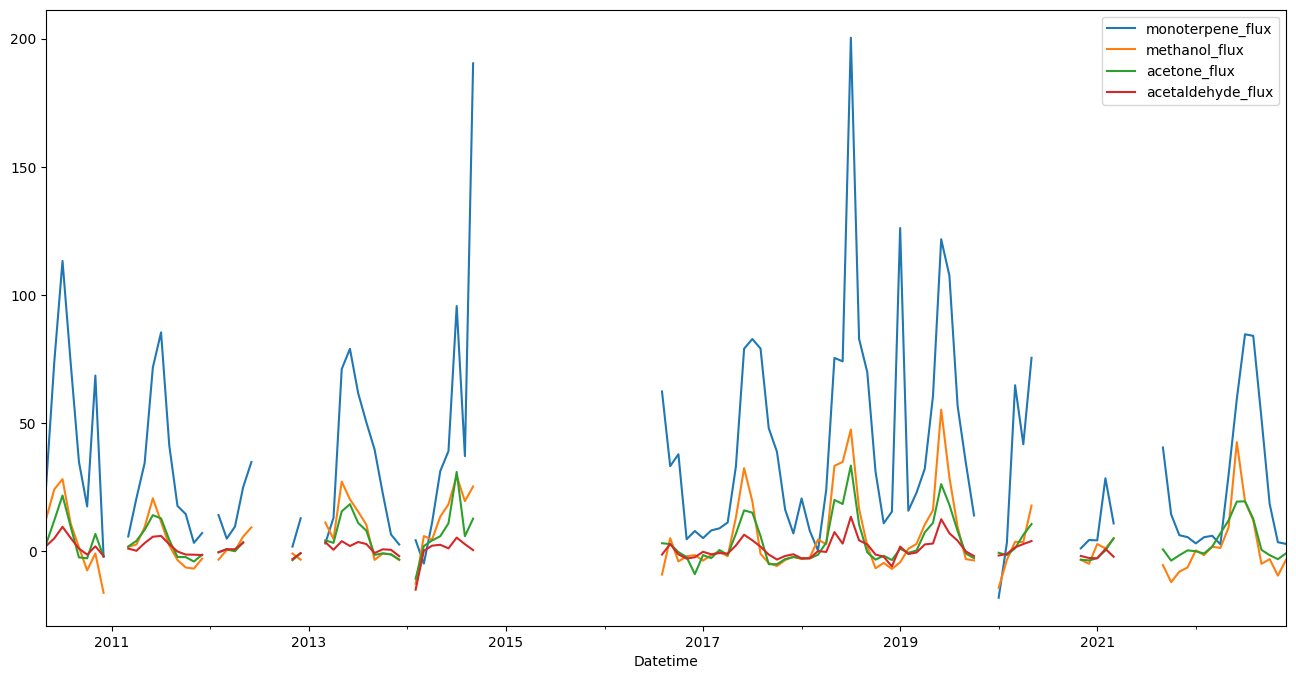

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df2.plot('Datetime', 'monoterpene_flux', ax=ax)
monthly_df2.plot('Datetime', 'methanol_flux', ax=ax)
monthly_df2.plot('Datetime', 'acetone_flux', ax=ax)
monthly_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

In [38]:
monthly_df3 = df3.resample('M', on = 'Datetime').mean().reset_index()
monthly_df3.head()

/tmp/ipykernel_15892/3689123087.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df3 = df3.resample('M', on = 'Datetime').mean().reset_index()


Datetime  Unnamed: 0  latent_heat_flux_after_4-2018  \
0 2018-04-30       694.0                      15.353727   
1 2018-05-31      2112.5                      58.062228   
2 2018-06-30      3545.5                      67.300773   
3 2018-07-31      4972.5                      78.518449   
4 2018-08-31      6418.0                      51.055049   

   latent_heat_flux_quality_flag_after_4-2018  
0                                    0.493880  
1                                    0.241713  
2                                    0.184767  
3                                    0.282730  
4                                    0.358076

In [45]:
monthly_df4 = df4.resample('M', on = 'Datetime').mean().reset_index()
monthly_df4.head()

/tmp/ipykernel_15892/2774332302.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df4 = df4.resample('M', on = 'Datetime').mean().reset_index()


Datetime  Unnamed: 0  HYY_EDDY233.LE  HYY_EDDY233.Qc_LE
0 2001-01-31       512.0        2.803608                NaN
1 2001-02-28      1610.0        5.288194                NaN
2 2001-03-31      2897.0        9.736921                NaN
3 2001-04-30      4313.5       16.981594                NaN
4 2001-05-31      5765.5       44.738316                NaN

<Axes: xlabel='Datetime'>

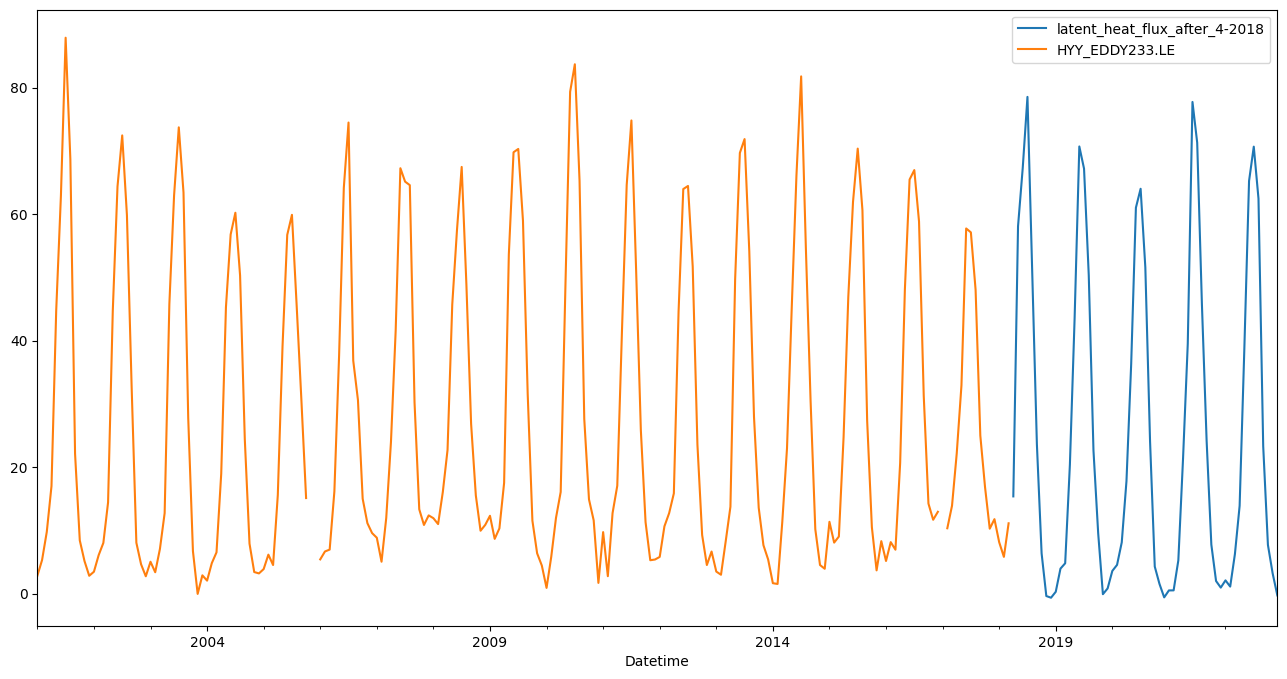

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df3.plot('Datetime', 'latent_heat_flux_after_4-2018', ax=ax)
monthly_df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)